<a href="https://colab.research.google.com/github/hbr8218/machine-learning/blob/master/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extraploratry Data Analysis

In [0]:
import pandas as pd
import numpy as np
np.random.seed(43)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#wget https://drive.google.com/open?id=1-Uf4GuXbmZDWupSapTbeReRZejLXcrma


In [0]:
from google.colab import files

In [0]:
my_csv = files.upload()

Saving 2nd Sem.-2014-15.xls to 2nd Sem.-2014-15 (1).xls


In [0]:
df =  pd.read_excel('2nd Sem.-2014-15.xls')
df.head()

,ROLL NO.,NAME,CS201,CH201,M201,ME201,ES201,CS291,CH291,ES291,ME291,SGPA1,SGPA2,YGPA,DGPA,RESULT
0,12500114001,ABHISHEK JAISWAL,C (24),C (24),D (20),C (24),C (24),A (16),A (16),A (16),A (24),6.19,6.48,6.34,0,XP
1,12500114002,ABHISHEK SHANKAR,C (24),D (20),C (24),D (20),D (20),E (18),E (18),A (16),A (24),6.41,6.34,6.38,0,P
2,12500114003,AISHWARYA,B (28),B (28),C (24),B (28),B (28),E (18),O (20),A (16),O (30),7.37,7.59,7.48,0,P
3,12500114004,AJAY KUMAR,C (24),C (24),C (24),A (32),B (28),A (16),E (18),A (16),A (24),7.74,7.10,7.41,0,P
4,12500114005,AKANCHA KUMARI,B (28),A (32),D (20),A (32),B (28),E (18),O (20),O (20),O (30),7.96,7.86,7.91,0,P


In [0]:
df = df.drop(['NAME','ROLL NO.'],axis=1)
df.head()

,CS201,CH201,M201,ME201,ES201,CS291,CH291,ES291,ME291,SGPA1,SGPA2,YGPA,DGPA,RESULT
0,C (24),C (24),D (20),C (24),C (24),A (16),A (16),A (16),A (24),6.19,6.48,6.34,0,XP
1,C (24),D (20),C (24),D (20),D (20),E (18),E (18),A (16),A (24),6.41,6.34,6.38,0,P
2,B (28),B (28),C (24),B (28),B (28),E (18),O (20),A (16),O (30),7.37,7.59,7.48,0,P
3,C (24),C (24),C (24),A (32),B (28),A (16),E (18),A (16),A (24),7.74,7.10,7.41,0,P
4,B (28),A (32),D (20),A (32),B (28),E (18),O (20),O (20),O (30),7.96,7.86,7.91,0,P


In [0]:
# extract digit from grade feature columns
def extract_digit(x):
  z = int(''.join(list(filter(lambda i:i.isdigit(),list(x)))))
  return z


In [0]:

grade_features = ['CS201','CH201','M201','ME201','ES201','CH291','CS291','ES291','ME291']

for var in grade_features:
  df[var] = df[var].apply(extract_digit)
    

In [0]:
df.head()

,CS201,CH201,M201,ME201,ES201,CS291,CH291,ES291,ME291,SGPA1,SGPA2,YGPA,DGPA,RESULT
0,24,24,20,24,24,16,16,16,24,6.19,6.48,6.34,0,XP
1,24,20,24,20,20,18,18,16,24,6.41,6.34,6.38,0,P
2,28,28,24,28,28,18,20,16,30,7.37,7.59,7.48,0,P
3,24,24,24,32,28,16,18,16,24,7.74,7.10,7.41,0,P
4,28,32,20,32,28,18,20,20,30,7.96,7.86,7.91,0,P


In [0]:
from collections import Counter

In [0]:
print(Counter(df['RESULT']).items())

dict_items([('XP', 99), ('P', 218)])


In [0]:
# replacing XP by 0 and P by 1
def replace(x):
  return 0 if x == 'XP' else 1

df['RESULT'] = df['RESULT'].apply(replace)

In [0]:


df_Y = df.pop('RESULT')
df.head()


,CS201,CH201,M201,ME201,ES201,CS291,CH291,ES291,ME291,SGPA1,SGPA2,YGPA,DGPA
0,24,24,20,24,24,16,16,16,24,6.19,6.48,6.34,0
1,24,20,24,20,20,18,18,16,24,6.41,6.34,6.38,0
2,28,28,24,28,28,18,20,16,30,7.37,7.59,7.48,0
3,24,24,24,32,28,16,18,16,24,7.74,7.10,7.41,0
4,28,32,20,32,28,18,20,20,30,7.96,7.86,7.91,0


In [0]:
drop_list = ['SGPA1','SGPA2','YGPA','DGPA']
df = df.drop(drop_list,axis=1)
df.head()

,CS201,CH201,M201,ME201,ES201,CS291,CH291,ES291,ME291
0,24,24,20,24,24,16,16,16,24
1,24,20,24,20,20,18,18,16,24
2,28,28,24,28,28,18,20,16,30
3,24,24,24,32,28,16,18,16,24
4,28,32,20,32,28,18,20,20,30


In [0]:
# retaining df that has to be used further
X = df.values
print(X[:2])

[[24 24 20 24 24 16 16 16 24]
 [24 20 24 20 20 18 18 16 24]]


In [0]:
df.shape

(317, 9)

In [0]:
df.columns


Index(['CS201', 'CH201', 'M201', 'ME201', 'ES201', 'CS291', 'CH291', 'ES291',
       'ME291'],
      dtype='object')

In [0]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit(df).fit_transform(df)
df_X = pd.DataFrame(scaled_data,columns=df.columns)
df_X.head()

,CS201,CH201,M201,ME201,ES201,CS291,CH291,ES291,ME291
0,0.177715,-0.529377,-0.910818,-0.095968,-0.168732,-0.846355,-0.832545,-1.176205,-1.130047
1,0.177715,-1.255837,-0.178002,-0.659333,-0.881908,0.253213,0.170941,-1.176205,-1.130047
2,0.730027,0.197084,-0.178002,0.467398,0.544443,0.253213,1.174427,-1.176205,1.543274
3,0.177715,-0.529377,-0.178002,1.030763,0.544443,-0.846355,0.170941,-1.176205,-1.130047
4,0.730027,0.923545,-0.910818,1.030763,0.544443,0.253213,1.174427,1.525657,1.543274


## Creating a Machine Learning Model

#### supervised learning

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df_X,df_Y,test_size=.2)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)



etc = ExtraTreesClassifier()

#cross validation
kf = KFold(n_splits=10)
cv_score = cross_val_score(etc,X_train,Y_train,cv=kf,scoring='accuracy')
print('mean_cv_score:',np.mean(cv_score))



(253, 9) (64, 9) (253,) (64,)
mean_cv_score: 0.8812307692307693


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

# tuning rfc

In [0]:
# No. of trees in ExtraTreesClassifier
n_estimators = [int(x) for x in np.linspace(start=100,stop=500,num=15)]
print(n_estimators)

# No. of features to consider  at every split
max_features = ['auto','sqrt','log2',None]
print(max_features)

# Maxm no. of levels in tree
max_depth = [int(i) for i in np.linspace(start=10,stop=150)]
max_depth.append(None)
print(max_depth)

#Minm no. of samples to split a node
min_samples_split=[2,3,4,5,10]

# Minm no. of samples required at each leaf node
min_samples_leaf = [1,2,4]

# methods for selecting samples for traning  each tree
bootstrap = [True,False]

# create param_grid
param_grid = dict(n_estimators = n_estimators,
                 max_features = max_features,
                 max_depth = max_depth,
                 min_samples_split = min_samples_split,
                 min_samples_leaf = min_samples_leaf,
                 bootstrap = bootstrap)

print (param_grid)

# cross validation using RandomizedSearchCV
rscv =  RandomizedSearchCV(etc,param_grid,cv=kf,scoring='accuracy')



[100, 128, 157, 185, 214, 242, 271, 300, 328, 357, 385, 414, 442, 471, 500]
['auto', 'sqrt', 'log2', None]
[10, 12, 15, 18, 21, 24, 27, 30, 32, 35, 38, 41, 44, 47, 50, 52, 55, 58, 61, 64, 67, 70, 72, 75, 78, 81, 84, 87, 90, 92, 95, 98, 101, 104, 107, 110, 112, 115, 118, 121, 124, 127, 130, 132, 135, 138, 141, 144, 147, 150, None]
{'n_estimators': [100, 128, 157, 185, 214, 242, 271, 300, 328, 357, 385, 414, 442, 471, 500], 'max_features': ['auto', 'sqrt', 'log2', None], 'max_depth': [10, 12, 15, 18, 21, 24, 27, 30, 32, 35, 38, 41, 44, 47, 50, 52, 55, 58, 61, 64, 67, 70, 72, 75, 78, 81, 84, 87, 90, 92, 95, 98, 101, 104, 107, 110, 112, 115, 118, 121, 124, 127, 130, 132, 135, 138, 141, 144, 147, 150, None], 'min_samples_split': [2, 3, 4, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [0]:
rscv.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction...
                                                      27, 30, 32, 35, 38, 41,
                

In [0]:
rscv.best_params_

{'bootstrap': False,
 'max_depth': 121,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 328}

In [0]:
etc = ExtraTreesClassifier(n_estimators=385,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',max_depth=144,
                          bootstrap=True)
# cross validation
cv_score = cross_val_score(etc,X_train,Y_train,cv=kf,scoring='accuracy')
print(np.mean(cv_score))

#train the model
y_pred = etc.fit(X_train,Y_train).predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.8967692307692309
0.953125


In [0]:

# feature importance
x,y =[],[]
etc.fit(X_train,Y_train)
f = list(zip(df.columns,etc.feature_importances_))
k  = lambda s: s[1]
f = sorted(f,key=k,reverse=True)
for i,j in f:
  y.append(i)
  x.append(j)

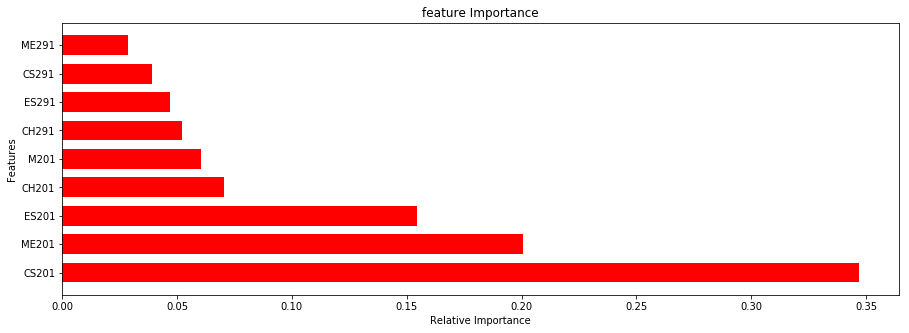

In [0]:
plt.figure(figsize=(15,5))
plt.title("feature Importance")
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.barh(y,x,height=.7,color='r')

plt.show()

In [0]:
fea_imp = ['CS201','ME201','ES201']
for i in fea_imp:
  print('no. of students having marks greater than mean marks of',i,':',df[df[i] > np.mean(df[i])][i].count(),', mean = ',np.mean(df[i]))


no. of students having marks greater than mean marks of CS201 : 183 , mean =  22.71293375394322
no. of students having marks greater than mean marks of ME201 : 137 , mean =  24.681388012618296
no. of students having marks greater than mean marks of ES201 : 146 , mean =  24.946372239747635


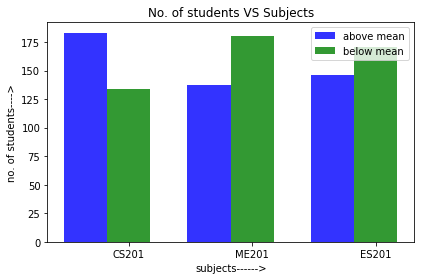

<Figure size 720x1152 with 0 Axes>

In [0]:



# no. of students above mean score
d_l = [] # list for storing no. of student score more than mean

fea_imp = ['CS201','ME201','ES201']
for i in fea_imp:
  d_l.append(df[df[i] > np.mean(df[i])][i].count())
  
# no. of students below mean score
l_d = [] # list for storing no. of student score more than mean

fea_imp = ['CS201','ME201','ES201']
for i in fea_imp:
  l_d.append(df[df[i] < np.mean(df[i])][i].count())

#plotting double bar graph

n_group = 3

#create plot
fig, ax = plt.subplots()
index = np.arange(n_group)
bar_width = 0.35
opacity = 0.8

plt.bar(index, d_l, bar_width,
alpha=opacity,
color='b',
label='above mean')

plt.bar(index + bar_width, l_d, bar_width,
alpha=opacity,
color='g',
label='below mean')

plt.title("No. of students VS Subjects")
plt.xlabel("subjects------>")
plt.ylabel("no. of students---->")

plt.xticks(index + bar_width, ('CS201', 'ME201', 'ES201'))
plt.legend()

plt.tight_layout()

plt.figure(figsize=(10,16))

plt.show()

#### Unsupervised Learning


In [0]:
from sklearn.decomposition import PCA

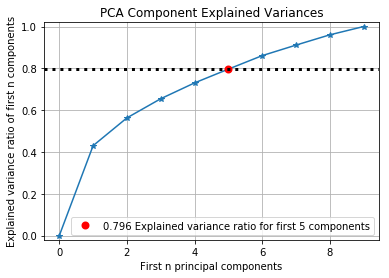

In [0]:
!pip install scikit-plot
import scikitplot as skplt
pca=PCA().fit(scaled_data)

skplt.decomposition.plot_pca_component_variance(pca)

In [0]:
pca_result = PCA(n_components=5).fit(scaled_data).fit_transform(scaled_data)

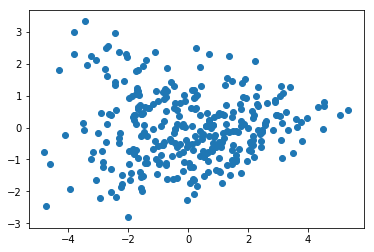

In [0]:
plt.scatter(pca_result[:,0],pca_result[:,1])
plt.show()

### Apply K-means clustering

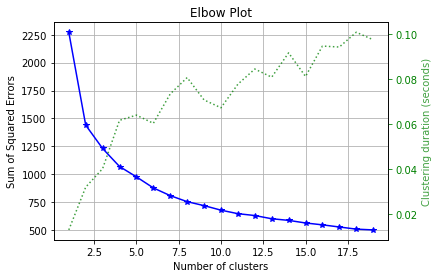

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans()
skplt.cluster.plot_elbow_curve(kmeans,pca_result,cluster_ranges=range(1,20))

No handles with labels found to put in legend.


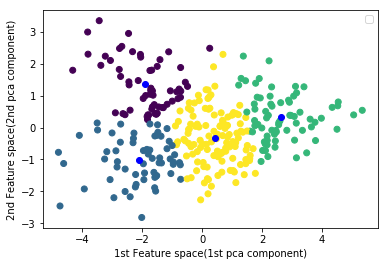

In [0]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_result)
plt.scatter(pca_result[:,0],pca_result[:,1],c=kmeans.labels_)
plt.xlabel("1st Feature space(1st pca component)")
plt.ylabel("2nd Feature space(2nd pca component)")

#cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='b')

#plt.scatter(-2.04031996,  0.05638455,  0.05634186,  0.0096862,c ='g',marker='s', s=100)
#plt.scatter(2.13246344, -0.05893095, -0.05888634, -0.01012364, c='g',marker='s',s=100)

plt.legend()
plt.show()

""


AttributeError: ignored

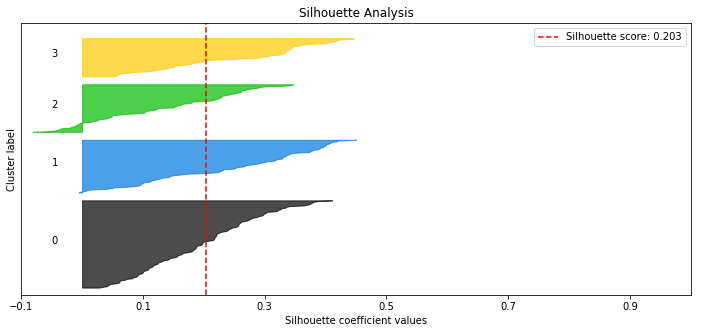

In [0]:
skplt.metrics.plot_silhouette(pca_result,kmeans.labels_,figsize=(12,5))
plt.show()

In [0]:
# Finding out no. of elements in each category (here 13 categories)
from collections import Counter
category = sorted(Counter(kmeans.labels_).items())
print(category)


[(0, 53), (1, 71), (2, 68), (3, 125)]


In [0]:
# zipping X(score by each student in diff. paper) and labels
t = list(zip(X,kmeans.labels_))
print(t[0])

(array([24, 24, 20, 24, 24, 16, 16, 16, 24]), 0)


In [0]:
# sorting a/c to labels
k = lambda x:x[1]
t_sort = sorted(t,key=k)


In [0]:
# checking sorted dataframe, at index=67 label should be 2
print(t_sort[:3])

[(array([24, 24, 20, 24, 24, 16, 16, 16, 24]), 0), (array([24, 24, 24, 32, 28, 16, 18, 16, 24]), 0), (array([28, 20, 20, 24, 24, 16, 18, 16, 24]), 0)]


In [0]:
label = list()
data = list()
for i in t_sort:
  data.append(i[0])
  label.append(i[1])

In [0]:
new_df1 = pd.DataFrame(data,columns=df.columns)
new_df1.head()
new_df1.shape

(317, 9)

In [0]:
new_df2 = pd.DataFrame(label,columns=['group'])
new_df2.head()
new_df2.shape

(317, 1)

In [0]:
#df.loc[44:50]

In [0]:

new_df = pd.concat([new_df1,new_df2], axis=1)
new_df.head()

,CS201,CH201,M201,ME201,ES201,CS291,CH291,ES291,ME291,group
0,24,24,20,24,24,16,16,16,24,0
1,24,24,24,32,28,16,18,16,24,0
2,28,20,20,24,24,16,18,16,24,0
3,20,24,20,28,24,16,16,16,24,0
4,24,24,20,32,28,18,16,16,24,0


In [0]:
df1 = new_df[0:53]

df1.tail()
df2 = new_df[53:124]
df2.tail(2)
df3 = new_df[124:192]
df3.tail(2)
df4 = new_df[192:]
df4.head()

,CS201,CH201,M201,ME201,ES201,CS291,CH291,ES291,ME291,group
192,28,28,24,28,28,18,20,16,30,3
193,28,24,24,28,24,18,20,18,30,3
194,20,24,20,32,24,18,18,18,24,3
195,20,28,32,32,28,18,18,16,24,3
196,24,28,24,28,24,20,18,20,24,3


In [0]:
def plotting(j): # j will be a dataframe
  
  l_d = [] # list for storing no. of student score more than mean
  d_l = [] # list for storing no. of student score more than mean
  fea_imp = ['CS201','ME201','ES201']
  for i in fea_imp:
    d_l.append(j[j[i] > np.mean(j[i])][i].count())
  
# no. of students below mean score

  fea_imp = ['CS201','ME201','ES201']
  for i in fea_imp:
    l_d.append(j[j[i] < np.mean(j[i])][i].count())

#plotting double bar graph

  n_group = 3

#create plot
  fig, ax = plt.subplots()
  index = np.arange(n_group)
  bar_width = 0.35
  opacity = 0.8

  plt.bar(index, d_l, bar_width,
  alpha=opacity,
  color='g',
  label='above mean')

  plt.bar(index + bar_width, l_d, bar_width,
  alpha=opacity,
  color='r',
  label='below mean')

  plt.title("No. of students VS Subjects")
  plt.xlabel("subjects------>")
  plt.ylabel("no. of students---->")

  plt.xticks(index + bar_width, ('CS201', 'ME201', 'ES201'))
  plt.legend()

  plt.tight_layout()

  plt.figure(figsize=(10,16))

  plt.show()

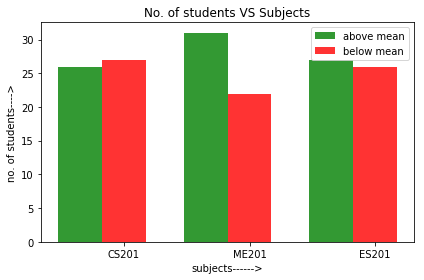

<Figure size 720x1152 with 0 Axes>

LABEL:  0 None


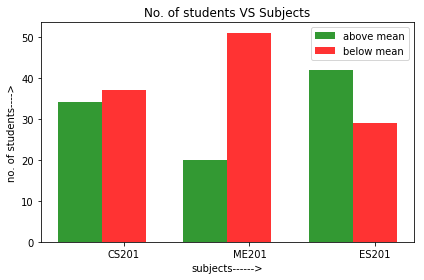

<Figure size 720x1152 with 0 Axes>

LABEL:  1 None


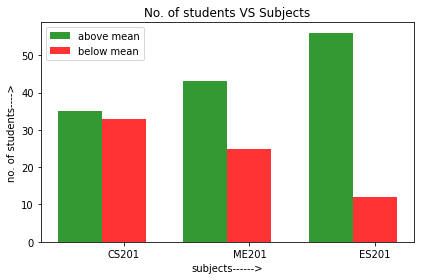

<Figure size 720x1152 with 0 Axes>

LABEL:  2 None


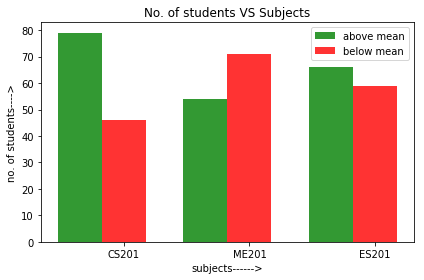

<Figure size 720x1152 with 0 Axes>

LABEL:  3 None


In [0]:
d = [df1,df2,df3,df4]

for i,j in enumerate(d):
  print("LABEL: ",i,plotting(j))

### Result Observation



From the 